<a href="https://colab.research.google.com/github/imabari/ImabariScraping/blob/master/kunitaka_school_area_data_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install rtree
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 41.2 MB/s 
     |████████████████████████████████| 6.3 MB 39.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.2 MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
df = pd.read_csv("accidents_fukui.csv")

In [ ]:
df

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,市区町村コード,昼夜,天候,地形,路面状態,道路形状,環状交差点の直径,信号機,一時停止規制 標識（当事者A）,一時停止規制 表示（当事者A）,一時停止規制 標識（当事者B）,一時停止規制 表示（当事者B）,車道幅員,道路線形,衝突地点,ゾーン規制,中央分離帯施設等,歩車道区分,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,用途別（当事者A）,用途別（当事者B）,車両形状（当事者A）,車両形状（当事者B）,速度規制（指定のみ）（当事者A）,速度規制（指定のみ）（当事者B）,車両の衝突部位（当事者A）,車両の衝突部位（当事者B）,車両の損壊程度（当事者A）,車両の損壊程度（当事者B）,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,曜日(発生年月日),祝日(発生年月日),発生地点,道路管理者区分,道路区分,道路構造,曲線半径,縦断勾配,トンネル番号,当事者車両台数,車両単独事故の対象物,臨時速度規制の有無,速度規制（臨時のみ）,トンネル延長距離,緯度,経度,発生日,発生時,color
0,本票,福井,高速道路交通警察隊,1,負傷,0,1,中部縦貫自動車道 上り,下,59,322,夜－暮,曇,非市街地,舗装－凍結,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－9.0m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両相互,55～64歳,25～34歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,前-無,後-無,小破,小破,その他,その他,その他,その他,損傷なし,負傷,金,その他,59.0,国土交通省,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,2.0,該当なし,あり－その他,50㎞/h以下,0.0,36.079816,136.362783,2018-12-28,17:45,blue
1,本票,福井,高速道路交通警察隊,2,負傷,0,1,北陸自動車道 上り,上,446,202,昼－昼,曇,非市街地,舗装－乾燥,単路－トンネル,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－13.0m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央分離帯,区分なし,車両相互,0～24歳,45～54歳,乗用車－普通車,乗用車－軽自動車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,後-無,前-無,小破,小破,その他,その他,その他,その他,負傷,損傷なし,木,その他,446.0,中日本高速道路,追越車線,完全分離－トンネル,直線,平坦－１％以上,小河,2.0,該当なし,あり－異常気象,50㎞/h以下,1125.0,35.627717,136.095899,2019-01-03,12:23,blue
2,本票,福井,高速道路交通警察隊,3,負傷,0,2,近畿自動車道 敦賀線 上り,上,1562,202,夜－夜,雪,非市街地,舗装－積雪,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両単独,45～54歳,不明,乗用車－普通車,物件等,自家用,対象外当事者,乗用車,対象外当事者,50㎞／ｈ以下,対象外当事者,右前-無,無-無,大破,対象外当事者,その他,対象外当事者,その他,対象外当事者,負傷,対象外当事者,木,その他,1562.0,中日本高速道路,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,1.0,その他,あり－異常気象,50㎞/h以下,0.0,35.601432,136.054062,2019-01-03,05:40,blue
3,本票,福井,高速道路交通警察隊,4,負傷,0,2,近畿自動車道 敦賀線 上り,上,1562,202,夜－夜,雪,非市街地,舗装－積雪,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両単独,0～24歳,不明,乗用車－普通車,物件等,自家用,対象外当事者,乗用車,対象外当事者,50㎞／ｈ以下,対象外当事者,前-無,無-無,大破,対象外当事者,その他,対象外当事者,その他,対象外当事者,損傷なし,対象外当事者,木,その他,1562.0,中日本高速道路,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,1.0,その他,あり－異常気象,50㎞/h以下,0.0,35.601379,136.054230,2019-01-03,05:45,blue
4,本票,福井,高速道路交通警察隊,5,負傷,0,2,近畿自動車道 敦賀線 上り,上,1562,202,夜－夜,雪,非市街地,舗装－積雪,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両単独,25～34歳,不明,乗用車－軽自動車,物件等,自家用,対象外当事者,乗用車,対象外当事者,50㎞／ｈ以下,対象外当事者,右前-無,無-無,中破,対象外当事者,その他,対象外当事者,その他,対象外当事者,負傷,対象外当事者,木,その他,1562.0,中日本高速道路,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,1.0,その他,あり－異常気象,50㎞/h以下,0.0,35.614034,135.995511,2019-01-03,05:46,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,本票,福井,福井南,130,負傷,0,1,一般都道府県道 21540,対象外,0,201,昼－昼,雨,非市街地,舗装－乾燥,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－9.0m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ペイント,区分あり－路側帯,車両相互,25～34歳,35～44歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,前-無,後-無,小破,小破,その他,その他,その他,その他,損傷なし,負傷,月,その他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.011538,136.203273,2021-12-13,12:02,blue
2944,本票,福井,福井南,131,負傷,0,1,国道8号線,下,4142,201,夜－夜,雪,非市街地,舗装－湿潤,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－13.0m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央分離帯,区分あり－縁石・ブロック等,車両相互,55～64歳,25～34歳,貨物車－大型車,乗用車－普通車,事業用,自家用,貨物車,乗用車,指定の速度規制なし等,指定の速度規制なし等,左前-無,右-無,小破,小破,その他,その他,その他,その他,損傷なし,損傷なし,金,その他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.021347,136.215062,2021-12-17,19:33,blue
2945,本票,福井,福井南,132,負傷,0,1,一般都道府県道 21540,対象外,0,201,夜－暮,雨,市街地－その他,舗装－湿潤,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－9.0m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ペイント,区分あり－縁石・ブロック等,車両相互,0～24歳,45～54歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,前-無,後-無,小破,小破,その他,その他,その他,その他,損傷なし,負傷,水,その他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.columns

Index(['資料区分', '都道府県コード', '警察署等コード', '本票番号', '事故内容', '死者数', '負傷者数', '路線コード',
       '上下線', '地点コード', '市区町村コード', '昼夜', '天候', '地形', '路面状態', '道路形状', '環状交差点の直径',
       '信号機', '一時停止規制　標識（当事者A）', '一時停止規制　表示（当事者A）', '一時停止規制　標識（当事者B）',
       '一時停止規制　表示（当事者B）', '車道幅員', '道路線形', '衝突地点', 'ゾーン規制', '中央分離帯施設等', '歩車道区分',
       '事故類型', '年齢（当事者A）', '年齢（当事者B）', '当事者種別（当事者A）', '当事者種別（当事者B）',
       '用途別（当事者A）', '用途別（当事者B）', '車両形状（当事者A）', '車両形状（当事者B）',
       '速度規制（指定のみ）（当事者A）', '速度規制（指定のみ）（当事者B）', '車両の衝突部位（当事者A）',
       '車両の衝突部位（当事者B）', '車両の損壊程度（当事者A）', '車両の損壊程度（当事者B）', 'エアバッグの装備（当事者A）',
       'エアバッグの装備（当事者B）', 'サイドエアバッグの装備（当事者A）', 'サイドエアバッグの装備（当事者B）',
       '人身損傷程度（当事者A）', '人身損傷程度（当事者B）', '曜日(発生年月日)', '祝日(発生年月日)', '発生地点',
       '道路管理者区分', '道路区分', '道路構造', '曲線半径', '縦断勾配', 'トンネル番号', '当事者車両台数',
       '車両単独事故の対象物', '臨時速度規制の有無', '速度規制（臨時のみ）', 'トンネル延長距離', '緯度', '経度', '発生日',
       '発生時', 'color'],
      dtype='object')

In [ ]:
pt_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["経度"], df["緯度"], crs=6668))

# 小学校区データ
https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-A27-v3_0.html

In [ ]:
!wget "https://nlftp.mlit.go.jp/ksj/gml/data/A27/A27-21/A27-21_18_GML.zip" -O fukui.zip

--2022-08-11 03:33:56--  https://nlftp.mlit.go.jp/ksj/gml/data/A27/A27-21/A27-21_18_GML.zip
Resolving nlftp.mlit.go.jp (nlftp.mlit.go.jp)... 147.154.99.182, 147.154.116.181, 192.29.105.247
Connecting to nlftp.mlit.go.jp (nlftp.mlit.go.jp)|147.154.99.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4535001 (4.3M) [application/zip]
Saving to: ‘fukui.zip’

fukui.zip           100%[===================>]   4.32M  6.11MB/s    in 0.7s    

2022-08-11 03:33:58 (6.11 MB/s) - ‘fukui.zip’ saved [4535001/4535001]



In [ ]:
school_area = gpd.read_file("fukui.zip")

In [ ]:
school_area.crs

<Geographic 2D CRS: EPSG:6668>
Name: JGD2011
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
school_area.rename(columns={"A27_004": "school"}, inplace=True)

In [ ]:
school_area

,A27_001,A27_002,A27_003,school,A27_005,geometry
0,18201,福井市立,B118210000117,旭小学校,福井市手寄2-2-5,"POLYGON ((136.22622 36.06286, 136.22627 36.062..."
1,18201,福井市立,B118210000180,安居小学校,福井市本堂町4-12,"POLYGON ((136.11341 36.06834, 136.11371 36.068..."
2,18201,福井市立,B118210000956,一乗小学校,福井市西新町1-4,"POLYGON ((136.27271 35.97565, 136.27234 35.975..."
3,18201,福井市立,B118210001027,羽生小学校,福井市大宮町12-31,"POLYGON ((136.38385 36.00054, 136.38400 36.001..."
4,18201,福井市立,B118210001456,越廼小学校,福井市茱崎町3-25,"POLYGON ((136.01315 36.01450, 136.01308 36.014..."
...,...,...,...,...,...,...
175,18501,若狭町立,B118210001553,明倫小学校,三方上中郡若狭町藤井2-43,"POLYGON ((135.90035 35.53509, 135.90133 35.536..."
176,18501,若狭町立,B118210001633,野木小学校,三方上中郡若狭町武生15-7-1,"POLYGON ((135.79737 35.48592, 135.79739 35.485..."
177,18202,敦賀市立,B118210000368,敦賀北小学校,敦賀市曙町11-94,"POLYGON ((136.09198 35.71230, 136.09216 35.712..."
178,18210,坂井市立,None,竹田小学校,坂井市丸岡町山口60-8,"POLYGON ((136.35978 36.16540, 136.35991 36.164..."


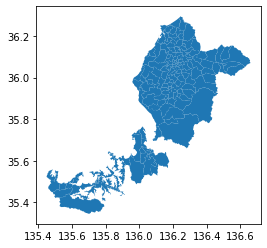

In [ ]:
school_area.plot()

In [ ]:
# geometryから校区を取得
fukui_df = gpd.sjoin(pt_df, school_area)
fukui_df

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,市区町村コード,昼夜,天候,地形,路面状態,道路形状,環状交差点の直径,信号機,一時停止規制 標識（当事者A）,一時停止規制 表示（当事者A）,一時停止規制 標識（当事者B）,一時停止規制 表示（当事者B）,車道幅員,道路線形,衝突地点,ゾーン規制,中央分離帯施設等,歩車道区分,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,用途別（当事者A）,用途別（当事者B）,車両形状（当事者A）,車両形状（当事者B）,速度規制（指定のみ）（当事者A）,速度規制（指定のみ）（当事者B）,車両の衝突部位（当事者A）,車両の衝突部位（当事者B）,車両の損壊程度（当事者A）,車両の損壊程度（当事者B）,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,曜日(発生年月日),祝日(発生年月日),発生地点,道路管理者区分,道路区分,道路構造,曲線半径,縦断勾配,トンネル番号,当事者車両台数,車両単独事故の対象物,臨時速度規制の有無,速度規制（臨時のみ）,トンネル延長距離,緯度,経度,発生日,発生時,color,geometry,index_right,A27_001,A27_002,A27_003,school,A27_005
0,本票,福井,高速道路交通警察隊,1,負傷,0,1,中部縦貫自動車道 上り,下,59,322,夜－暮,曇,非市街地,舗装－凍結,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－9.0m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両相互,55～64歳,25～34歳,乗用車－普通車,乗用車－普通車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,前-無,後-無,小破,小破,その他,その他,その他,その他,損傷なし,負傷,金,その他,59.0,国土交通省,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,2.0,該当なし,あり－その他,50㎞/h以下,0.0,36.079816,136.362783,2018-12-28,17:45,blue,POINT (136.36278 36.07982),137,18322,永平寺町立,B118210001063,志比小学校,吉田郡永平寺町谷口1-70
118,本票,福井,高速道路交通警察隊,6,負傷,0,1,中部縦貫自動車道 下り,下,0,322,昼－昼,雪,非市街地,舗装－積雪,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両相互,35～44歳,25～34歳,乗用車－普通車,乗用車－軽自動車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,前-無,前-無,中破,中破,その他,その他,その他,その他,損傷なし,損傷なし,土,その他,81.0,国土交通省,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,2.0,該当なし,あり－異常気象,50㎞/h以下,0.0,36.080423,136.361881,2019-01-26,13:10,blue,POINT (136.36188 36.08042),137,18322,永平寺町立,B118210001063,志比小学校,吉田郡永平寺町谷口1-70
581,本票,福井,高速道路交通警察隊,19,負傷,0,4,中部縦貫自動車道 上り,上,7500,322,昼－昼,曇,非市街地,舗装－乾燥,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－平坦,単路（交差点付近を含む）,規制なし,中央線－ポストコーン,区分なし,車両相互,0～24歳,35～44歳,乗用車－普通車,乗用車－軽自動車,自家用,自家用,乗用車,乗用車,70㎞／ｈ以下,70㎞／ｈ以下,前-無,前-無,中破,中破,その他,その他,その他,その他,損傷なし,負傷,日,その他,75.0,国土交通省,走行車線－第一通行帯,非分離－その他,直線,平坦・該当なし,NaN,2.0,該当なし,該当なし,該当なし,0.0,36.081435,136.360275,2019-06-09,17:50,blue,POINT (136.36028 36.08143),137,18322,永平寺町立,B118210001063,志比小学校,吉田郡永平寺町谷口1-70
972,本票,福井,福井,354,負傷,0,1,国道416号線,対象外,0,322,夜－暮,晴,非市街地,舗装－乾燥,交差点－その他,環状交差点以外 環状交差点以外をいう。,施設なし,規制なし,表示なし,対象外当事者,その他,交差点－中（5.5m以上）－中,直線－平坦,交差点内,規制なし,中央線－ペイント,区分あり－路側帯,人対車両,55～64歳,75歳以上,乗用車－軽自動車,歩行者,自家用,対象外当事者,乗用車,対象外当事者,50㎞／ｈ以下,対象外当事者,左前-無,無-無,小破,対象外当事者,その他,対象外当事者,その他,対象外当事者,損傷なし,負傷,木,その他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.097605,136.328115,2019-10-10,18:00,blue,POINT (136.32811 36.09761),137,18322,永平寺町立,B118210001063,志比小学校,吉田郡永平寺町谷口1-70
1735,本票,福井,福井,160,死亡,1,0,一般市町村道 37000,対象外,0,322,昼－昼,晴,非市街地,舗装－乾燥,単路－その他,環状交差点以外 環状交差点以外をいう。,施設なし,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－平坦,その他,規制なし,中央線－ペイント,区分あり－路側帯,車両単独,45～54歳,不明,乗用車－軽自動車,物件等,自家用,対象外当事者,乗用車,対象外当事者,50㎞／ｈ以下,対象外当事者,前-無,無-無,中破,対象外当事者,その他,対象外当事者,その他,対象外当事者,損傷なし,対象外当事者,土,その他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.090084,136.345521,2020-09-05,08:34,red,POINT (136.34552 36.09008),137,18322,永平寺町立,B118210001063,志比小学校,吉田郡永平寺町谷口1-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,本票,福井,勝山,7,負傷,0,1,都道府県道 10240,対象外,0,206,昼－昼,曇,非市街地,舗装－乾燥,単路－その他,環状交差点以外 環状交差点以外をいう。,点灯－３灯式,対象外当事者,その他,対象外当事者,その他,単路－5.5m以上,直線－上り,単路（交差点付近を含む）,規制なし,中央線－ペイント,区分あり－縁石・ブロック等,車両相互,45～54歳,35～44歳,乗用車－軽自動車,乗用車－軽自動車,自家用,自家用,乗用車,乗用車,50㎞／ｈ以下,50㎞／ｈ以下,前-無,後-無,小破,小破,その他,その他,その他,その他,損傷なし,負傷,金,その他,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.025516,136.515694,2021-06-18,09:07,blue,POINT (136.51569 36.02552),77,18206,勝山市立,B118210000750,平泉寺小学校,勝山市平泉寺町平泉寺164-12
2612,本票,福井,福井南,81,負傷,0,1,一般市町村道 37000,対象外,0,201,昼－昼,晴,非市街地,舗装－乾燥,交差点－その他,環状交差点以外 環状交差点以外をいう。,施設なし,規制なし,表示なし,規制なし,表示なし,交差点－中（5.5m以上）－小,直線－平坦,交差点内,規制なし,中央線－ペイント,区分あり－路側帯,車両相互,75歳以上,45～54歳,乗用車－普通車,乗用車－軽自動車,自家用,自家用,乗用車,乗用車,指定の速度規制なし等,40㎞／ｈ以下,前-無,右-無,中破,中破

In [ ]:
fukui_df["school"].unique()

array(['志比小学校', '黒河小学校', '美浜東小学校', '森田小学校', '春山小学校', '和田小学校', '宝永小学校',
       '西藤島小学校', '東藤島小学校', '大安寺小学校', '順化小学校', '中藤小学校', '日新小学校', '旭小学校',
       '円山小学校', '啓蒙小学校', '明新小学校', '河合小学校', '松本小学校', '湊小学校', '羽生小学校',
       '磯部小学校', '平章小学校', '大石小学校', '大関小学校', '高椋小学校', '春江小学校', '芦原小学校',
       '三国北小学校', '加戸小学校', '鯖江東小学校', '中河小学校', '神明小学校', '北中山小学校', '武生西小学校',
       '神山小学校', '敦賀南小学校', '中央小学校', '中郷小学校', '明倫小学校', '美浜中央小学校', '青郷小学校',
       '雲浜小学校', '小浜美郷小学校', '本郷小学校', '清明小学校', '社南小学校', '豊小学校', '麻生津小学校',
       '文殊小学校', '社北小学校', '木田小学校', '足羽小学校', '明章小学校', '岡保小学校', '日之出小学校',
       '下宇坂小学校', '野向小学校', '荒土小学校', '東十郷小学校', '長畝小学校', '金津東小学校', '萩野小学校',
       '進徳小学校', '朝日小学校', '南条小学校', '王子保小学校', '味真野小学校', '国高小学校', '美浜西小学校',
       '敦賀西小学校', '粟野小学校', '口名田小学校', '高浜小学校', '三宅小学校', '今富小学校', '社西小学校',
       '棗小学校', '清水東小学校', '安居小学校', '松岡小学校', '酒生小学校', '成器南小学校', '北郷小学校',
       '木部小学校', '兵庫小学校', '春江西小学校', '金津小学校', '三国南小学校', '鳥羽小学校', '惜陰小学校',
       '宮崎小学校', '吉野小学校', 'みそみ小学校', '内外海小学校', '湯尾小学校', '御陵小学校', '東安居

In [ ]:
fukui_df["school"].value_counts().plot.barh(height=1500)

In [ ]:
kunitaka_df = (
    fukui_df[fukui_df["school"] == "国高小学校"]
    .reindex(
        columns=[
            "緯度",
            "経度",
            "事故内容",
            "事故類型",
            "年齢（当事者A）",
            "年齢（当事者B）",
            "当事者種別（当事者A）",
            "当事者種別（当事者B）",
        ]
    )
    .reset_index(drop=True)
)

In [ ]:
kunitaka_df

,緯度,経度,事故内容,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）
0,35.908841,136.191946,負傷,車両相互,0～24歳,25～34歳,貨物車－準中型車,乗用車－普通車
1,35.918041,136.191194,負傷,車両相互,25～34歳,25～34歳,乗用車－軽自動車,貨物車－軽自動車
2,35.911226,136.177876,負傷,人対車両,45～54歳,45～54歳,乗用車－普通車,歩行者
3,35.916966,136.193341,負傷,車両相互,65～74歳,55～64歳,乗用車－普通車,乗用車－普通車
4,35.913176,136.191760,負傷,車両相互,45～54歳,25～34歳,乗用車－普通車,乗用車－軽自動車
5,35.912417,136.188926,負傷,車両相互,0～24歳,45～54歳,乗用車－普通車,乗用車－普通車
6,35.918619,136.176675,負傷,車両相互,0～24歳,35～44歳,乗用車－普通車,貨物車－普通車
7,35.917501,136.179290,負傷,車両相互,45～54歳,35～44歳,乗用車－軽自動車,乗用車－軽自動車
8,35.906034,136.192055,負傷,車両相互,65～74歳,45～54歳,乗用車－軽自動車,乗用車－軽自動車
9,35.920809,136.190953,負傷,車両相互,35～44歳,0～24歳,乗用車－普通車,乗用車－軽自動車


In [ ]:
kunitaka_df.to_csv("./accidents_kuknitaka.csv")

In [ ]:
def encode(lat: float, lng: float, level: int):
    if level < 1:
        return null
    res = ""
    if lng >= 0:
        res += "E"
    else:
        res += "W"
        lng += 180
    lat += 90  # 180:the North Pole,  0:the South Pole
    unit = 180
    for i in range(1, level):
        unit /= 3
        x = int(lng / unit)
        y = int(lat / unit)
        res += chr(ord("0") + x + y * 3 + 1)
        lng -= x * unit
        lat -= y * unit
    return res

In [ ]:
kunitaka_df["Geo3x3"] = kunitaka_df[["緯度", "経度"]].apply(lambda x: encode(x[0], x[1], 15), axis=1)

In [ ]:
# 緯度・経度削除
kunitaka_df.drop(["緯度", "経度"], axis=1, inplace=True)

In [ ]:
kunitaka_df

,事故内容,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,Geo3x3
0,負傷,車両相互,0～24歳,25～34歳,貨物車－準中型車,乗用車－普通車,E91384989426169
1,負傷,車両相互,25～34歳,25～34歳,乗用車－軽自動車,貨物車－軽自動車,E91384989725291
2,負傷,人対車両,45～54歳,45～54歳,乗用車－普通車,歩行者,E91384988641557
3,負傷,車両相互,65～74歳,55～64歳,乗用車－普通車,乗用車－普通車,E91384989731344
4,負傷,車両相互,45～54歳,25～34歳,乗用車－普通車,乗用車－軽自動車,E91384989459451
5,負傷,車両相互,0～24歳,45～54歳,乗用車－普通車,乗用車－普通車,E91384989446736
6,負傷,車両相互,0～24歳,35～44歳,乗用車－普通車,貨物車－普通車,E91384988836762
7,負傷,車両相互,45～54歳,35～44歳,乗用車－軽自動車,乗用車－軽自動車,E91384988912925
8,負傷,車両相互,65～74歳,45～54歳,乗用車－軽自動車,乗用車－軽自動車,E91384989186519
9,負傷,車両相互,35～44歳,0～24歳,乗用車－普通車,乗用車－軽自動車,E91384989752799


In [ ]:
kunitaka_df.to_csv("./accidents_kuknitaka_geo3x3.csv")